#  Investment Case Study


#### Spark Funds, an asset management company, wants to make investments in a few companies. The CEO of Spark Funds wants to understand the global trends in investments so that she can make investment decisions effectively.

#### Spark Funds has two minor constraints for investments:
    
   1. It wants to invest between **5 to 15 million USD** per round of investment
   2. It wants to invest only in **English-speaking countries** because of the ease of communication with the companies it would invest into.

-------------
#### Starategy:
    Spark Funds wants to invest where most other investors are investing. This pattern is often observed among early-stage startup investors.
--------
#### The business objectives and goals of data analysis are pretty straightforward:
   1. Business objective: 
       The objective is to identify the best sectors, countries, and a suitable investment type for making investments. The overall strategy is to invest where others are investing, implying that the 'best' sectors and countries are the ones where most investors are investing. <br>
       

   2. Goals of data analysis: Your goals are divided into three sub-goals: <br>
   
         1. Investment type analysis: Comparing the typical investment amounts in the venture, seed, angel, private equity, etc. so that Spark Funds can choose the type that is best suited for their strategy.<br>
         
         2. Country analysis: Identifying the countries which have been the most heavily invested in the past. These will be Spark Funds’ favorites as well.<br>
         
         3. Sector analysis: Understanding the distribution of investments across the eight main sectors. (Note that we are interested in the eight 'main sectors' provided in the mapping file. The two files — companies and rounds2 — have numerous sub-sector names; hence, you will need to map each sub-sector to its main sector.)

------

# *Import Relevant Packages and Libraries*

In [1]:
import numpy as np
import pandas as pd

#When using loc method to derive subdataframe it gives warning,in order to suppress that I've changed  values to 'None'.
pd.options.mode.chained_assignment = None

#for Visualization
import matplotlib.pyplot as plt 
import seaborn as sns

%matplotlib inline

In [2]:
#Reading companies and rounds2 file from directory

companies=pd.read_csv('data/companies.csv',encoding = 'ISO-8859-1')
rounds2=pd.read_csv('data/rounds2.csv',encoding = 'ISO-8859-1')

In [3]:
rounds2.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/ORGANIZATION/-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0


In [4]:
companies.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/Organization/-Fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/Organization/-Qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/Organization/-The-One-Of-Them-Inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
3,/Organization/0-6-Com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
4,/Organization/004-Technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010


### Understanding  **rounds2** data and perform cleaning.

In [5]:
rounds2

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/ORGANIZATION/-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0
...,...,...,...,...,...,...
114944,/organization/zzzzapp-com,/funding-round/8f6d25b8ee4199e586484d817bceda05,convertible_note,NaN,01-03-2014,41313.0
114945,/ORGANIZATION/ZZZZAPP-COM,/funding-round/ff1aa06ed5da186c84f101549035d4ae,seed,NaN,01-05-2013,32842.0
114946,/organization/ãeron,/funding-round/59f4dce44723b794f21ded3daed6e4fe,venture,A,01-08-2014,NaN
114947,/ORGANIZATION/ÃASYS-2,/funding-round/35f09d0794651719b02bbfd859ba9ff5,seed,NaN,01-01-2015,18192.0


In [6]:
rounds2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114949 entries, 0 to 114948
Data columns (total 6 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   company_permalink        114949 non-null  object 
 1   funding_round_permalink  114949 non-null  object 
 2   funding_round_type       114949 non-null  object 
 3   funding_round_code       31140 non-null   object 
 4   funded_at                114949 non-null  object 
 5   raised_amount_usd        94959 non-null   float64
dtypes: float64(1), object(5)
memory usage: 5.3+ MB


In [7]:
100*rounds2.isnull().sum()/len(rounds2)

company_permalink           0.000000
funding_round_permalink     0.000000
funding_round_type          0.000000
funding_round_code         72.909725
funded_at                   0.000000
raised_amount_usd          17.390321
dtype: float64

Among all these columns in rounds2, we have few missing values in **funding_round_code** and **raised_amount_usd**. <br>

We can drop these columns as it has **72% missing values**. We also don't need **funded_at** column. However, We will not be dropping any missing values from **raised_amount_usd** as it will remove companies' names which may be useful in further analysis.

In [8]:
rounds2.drop(['funding_round_code','funded_at'],axis=1,inplace=True)

We saw that there are few ID in **permalink columns** which are not properly encoded and companies data have same columns named as **permalink**. Let's fix this encoding and convert columns to lower case.

In [9]:
rounds2['company_permalink']=rounds2['company_permalink'].str.encode('utf_8').str.decode('ascii', 'ignore').str.lower()

In [10]:
rounds2

,company_permalink,funding_round_permalink,funding_round_type,raised_amount_usd
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,10000000.0
1,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,NaN
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,700000.0
3,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,3406878.0
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,2000000.0
...,...,...,...,...
114944,/organization/zzzzapp-com,/funding-round/8f6d25b8ee4199e586484d817bceda05,convertible_note,41313.0
114945,/organization/zzzzapp-com,/funding-round/ff1aa06ed5da186c84f101549035d4ae,seed,32842.0
114946,/organization/eron,/funding-round/59f4dce44723b794f21ded3daed6e4fe,venture,NaN
114947,/organization/asys-2,/funding-round/35f09d0794651719b02bbfd859ba9ff5,seed,18192.0


<AxesSubplot:>

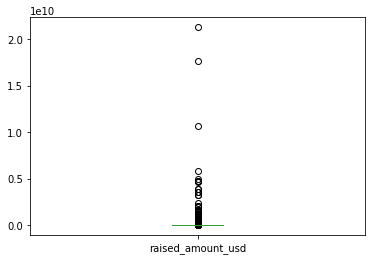

In [11]:
#Plotting Box plot to understand overall Raised amount

rounds2['raised_amount_usd'].plot.box()

In [12]:
#Above graph does not tell much about Raised Amount hence we will describe this instead with numbers.
#Dividing it by 1,000,000 for better readability

rounds2['raised_amount_usd'].describe()/1000000 

count        0.094959
mean        10.426869
std        114.821248
min          0.000000
25%          0.322500
50%          1.680511
75%          7.000000
max      21271.935000
Name: raised_amount_usd, dtype: float64

### This shows that almost 75% of the funding has been done below 7 million.

In [13]:
#Checking shape of companies and rounds2 dataframes

print('Companies :',companies.shape)
print('Rounds2 :',rounds2.shape)

Companies : (66368, 10)
Rounds2 : (114949, 4)


#### Understanding  **companies** and perform cleaning.

In [14]:
companies.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/Organization/-Fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/Organization/-Qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/Organization/-The-One-Of-Them-Inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
3,/Organization/0-6-Com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
4,/Organization/004-Technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010


In [15]:
companies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66368 entries, 0 to 66367
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   permalink      66368 non-null  object
 1   name           66367 non-null  object
 2   homepage_url   61310 non-null  object
 3   category_list  63220 non-null  object
 4   status         66368 non-null  object
 5   country_code   59410 non-null  object
 6   state_code     57821 non-null  object
 7   region         58338 non-null  object
 8   city           58340 non-null  object
 9   founded_at     51147 non-null  object
dtypes: object(10)
memory usage: 5.1+ MB


As our analysis more related to **raised amount, country and category_list**, we can drop **state_code, city, status and region**

In [16]:
companies=companies.drop(['status','state_code','region','city'],axis=1)

In [17]:
#Checking Missing Values in %
#We will do some analysis with founded_at columns then we will drop this columns.

companies.isnull().sum()/len(companies)*100

permalink         0.000000
name              0.001507
homepage_url      7.621143
category_list     4.743250
country_code     10.483968
founded_at       22.934245
dtype: float64

In [18]:
#We have the same encoding issue for permalink and name columns in companies. 
#Also, we will be lowering the case in permalink to avoid any weird result while performing merge on these two data frames.

companies['permalink'] = companies['permalink'].str.encode('utf-8').str.decode('ascii', 'ignore').str.lower()
companies['name'] = companies['name'].str.encode('utf-8').str.decode('ascii', 'ignore')

In [19]:
#There is one company name missing in name columns we can fill it from reference of permalink
#We will do it in an automated way even we have only one name missing
companies[companies['name'].isnull()]

,permalink,name,homepage_url,category_list,country_code,founded_at
56916,/organization/tell-it-in,NaN,http://tellitin10.com,Startups,USA,01-10-2011


In [20]:
companies['name']=companies['name'].fillna(companies['permalink'].str.split('/',expand=True)[2])

In [21]:
#Analysis based on founded_at columns

companies['founded_at']=pd.to_datetime(companies['founded_at'],errors = 'coerce')

<AxesSubplot:>

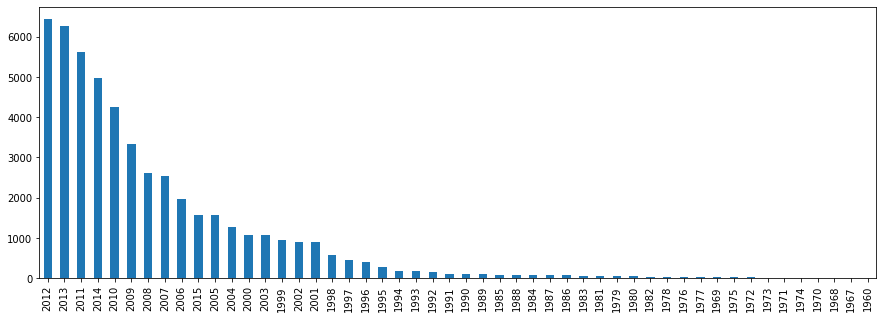

In [22]:
#No. of Companies founded in particluar year

plt.figure(figsize=(15,5))
companies['founded_at'].dt.year.astype('Int64').value_counts().head(50).plot(kind='bar')

<AxesSubplot:>

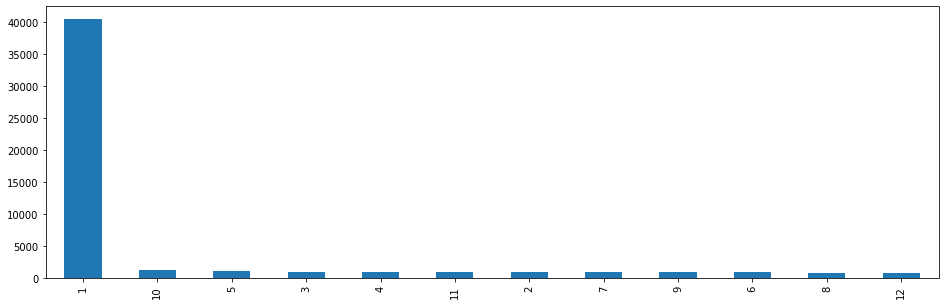

In [23]:
#No. of Companies founded in particluar month

plt.figure(figsize=(16,5))
companies['founded_at'].dt.month.astype('Int64').value_counts().head(50).plot(kind='bar')

<AxesSubplot:>

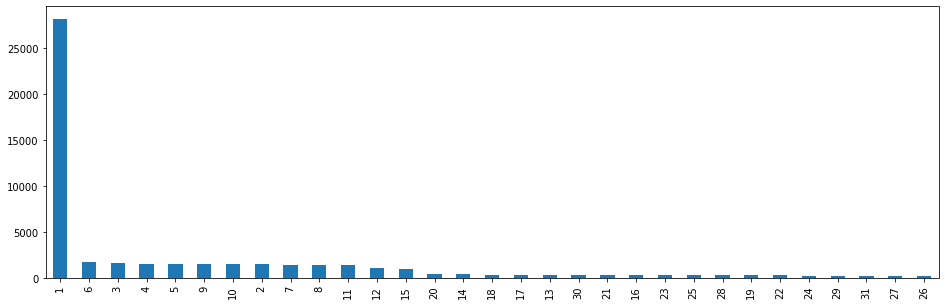

In [24]:
#No. of Companies founded in particluar day of the month

plt.figure(figsize=(16,5))
companies['founded_at'].dt.day.astype('Int64').value_counts().head(50).plot(kind='bar')

**Looking at above graphs, Many companies has been founded between 1999 to 2014.** <br>


**Majority of companies foundation date is 1st of Jan!**

In [25]:
# We can now drop 'founded at' columns 

companies=companies.drop(['founded_at'],axis=1)

In [26]:
#Finding out Unique companies in rounds2

print(f"No. of unique companies in rounds2 {rounds2['company_permalink'].nunique()}.")

No. of unique companies in rounds2 66368.


In [27]:
#Finding out Unique companies in Companies

print(f"No. of unique companies in companies {companies['permalink'].nunique()}.")

No. of unique companies in companies 66368.


In [28]:
#Checking if there is any companies in the rounds2 which are not present in companies
#We can also use set operations | easy understanding 

rounds2.merge(companies,how='left',left_on='company_permalink',right_on='permalink',
              indicator='Exist')['Exist'].value_counts()

both          114949
left_only          0
right_only         0
Name: Exist, dtype: int64

##### There are no companies as such who are only in rounds2 but in companies.

## Let's merge these two dataframes into **master_frame**.

Merging the two data frames so that all variables (columns) in the companies frame are added to the rounds2 data frame. Naming the merged frame master_frame.

In [29]:
master_frame=rounds2.merge(companies,how='left',left_on='company_permalink',right_on='permalink')

In [30]:
#Checking the shape of master_frame

master_frame.shape

(114949, 9)

In [31]:
# Compnay_permalink and permalink columns are redundant so we will remove one of them.

master_frame=master_frame.drop('permalink',axis=1)

---------

# Funding Type Analysis

In [32]:
master_frame.head()

,company_permalink,funding_round_permalink,funding_round_type,raised_amount_usd,name,homepage_url,category_list,country_code
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,10000000.0,#fame,http://livfame.com,Media,IND
1,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,NaN,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,USA
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,700000.0,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,USA
3,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,3406878.0,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,NaN
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,2000000.0,0-6.com,http://www.0-6.com,Curated Web,CHN


In [33]:
#Checking overall statistic of each funding type w.r.t raised amount
#style has been used to apply conditional formatting along with each columns

master_frame.groupby('funding_round_type').describe().style.background_gradient().set_precision(0)

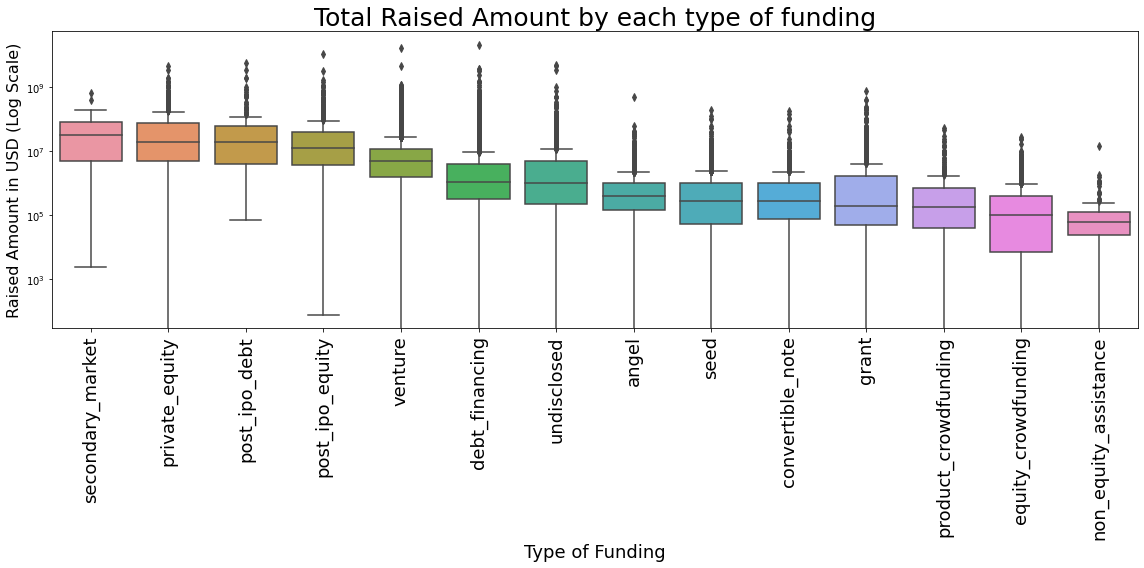

In [34]:
#Plotting above data as boxplot where y-axis on logscale
plt.figure(figsize=(16,8))

ord_fund_type=master_frame.groupby('funding_round_type').median().sort_values('raised_amount_usd',ascending=False).index
sns.boxplot(data=master_frame,x='funding_round_type',y='raised_amount_usd',order=ord_fund_type)

plt.xticks(rotation=90,fontsize=18)
plt.yscale("log")


plt.xlabel('Type of Funding', fontsize=18)
plt.ylabel('Raised Amount in USD (Log Scale)', fontsize=16)
plt.title('Total Raised Amount by each type of funding',fontsize=25)
plt.tight_layout()

plt.savefig('Plots/Total Raised Amount by each type of funding_boxplot',dpi=200)


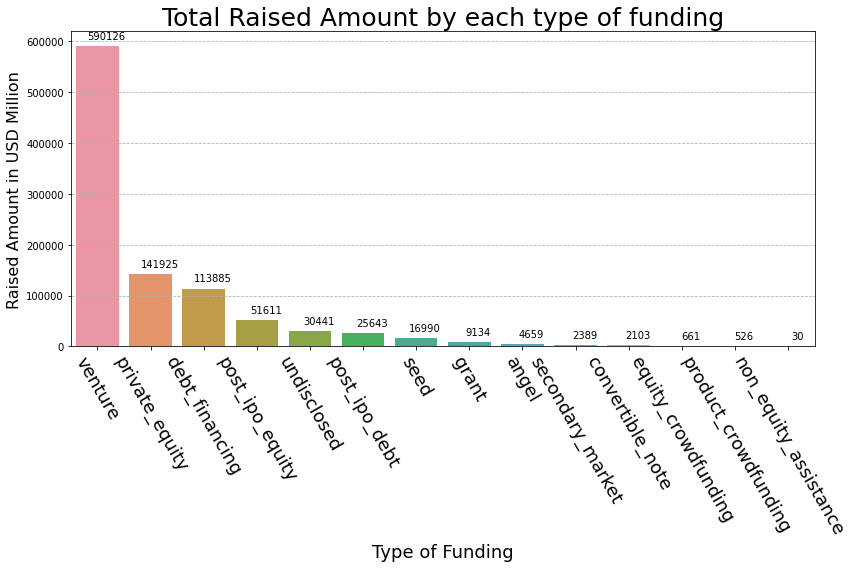

In [35]:
# Making copy of master_frame and dividing raised amount by 1,000,000

df=master_frame.copy()
df['raised_amount_usd']=df['raised_amount_usd']/1000000
ordered=df.groupby('funding_round_type').sum().sort_values('raised_amount_usd',ascending=False).index

# Plotting Total Raised Amount by each different funding type
plt.figure(figsize=(12,8))
plots=sns.barplot(data=df,x='funding_round_type',y='raised_amount_usd',estimator=np.sum,order=ordered,ci=None)
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.0f'), 
                       (bar.get_x() + bar.get_width() / 2, 
                        bar.get_height()), ha='center', va='center',
                       size=10, xytext=(9, 10),
                       textcoords='offset points')
plt.xticks(rotation=-60,fontsize=18)
plt.xlabel('Type of Funding', fontsize=18)
plt.ylabel('Raised Amount in USD Million', fontsize=16)
plt.title('Total Raised Amount by each type of funding',fontsize=25)
plt.grid(axis = 'y', linestyle = '--')

plt.tight_layout()
plt.savefig('Plots/Total Raised Amount by each type of funding',dpi=300)


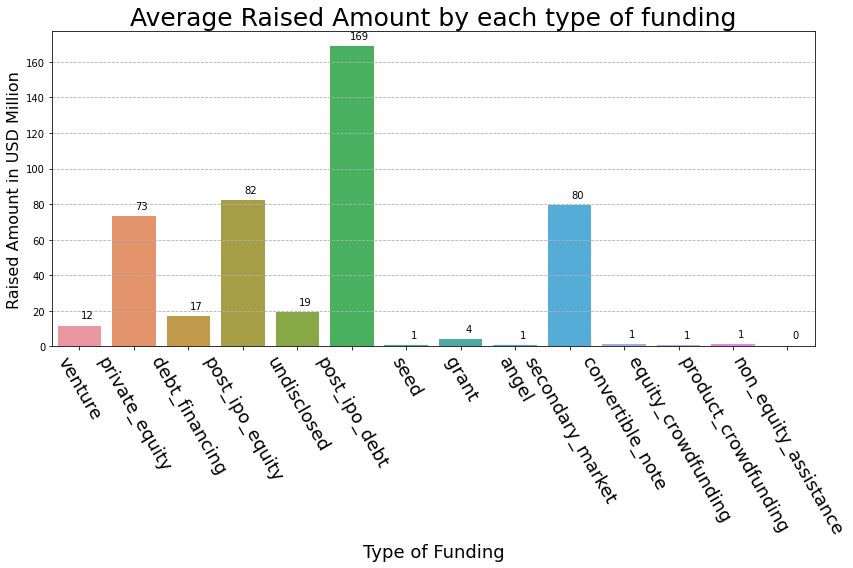

In [36]:
# Plotting Average Raised Amount by each different funding type
plt.figure(figsize=(12,8))
plots=sns.barplot(data=df,x='funding_round_type',y='raised_amount_usd',estimator=np.mean,order=ordered,ci=None)
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.0f'), 
                       (bar.get_x() + bar.get_width() / 2, 
                        bar.get_height()), ha='center', va='center',
                       size=10, xytext=(8, 10),
                       textcoords='offset points')
plt.xticks(rotation=-60, fontsize=18)
plt.xlabel('Type of Funding', fontsize=18)
plt.ylabel('Raised Amount in USD Million', fontsize=16)
plt.title('Average Raised Amount by each type of funding',fontsize=25)
plt.grid(axis = 'y', linestyle = '--')

plt.tight_layout()
plt.savefig('Plots/Average Raised Amount by each type of funding',dpi=200)

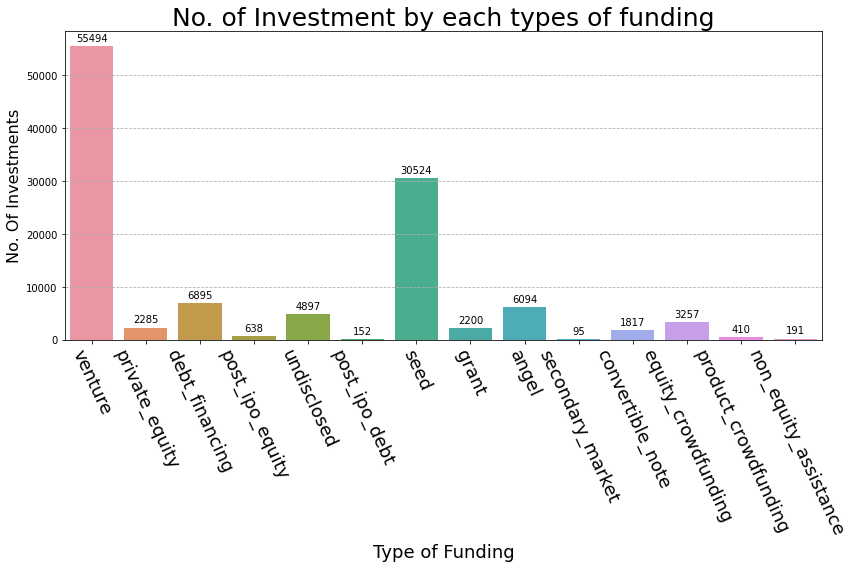

In [37]:
#Plotting No.of Investment by each funding type
plt.figure(figsize=(12,8))
plots=sns.countplot(data=df,x='funding_round_type',order=ordered)
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.0f'), 
                       (bar.get_x() + bar.get_width() / 2, 
                        bar.get_height()), ha='center', va='center',
                       size=10, xytext=(0, 8),
                       textcoords='offset points')
plt.xticks(rotation=-65, fontsize=18)
plt.xlabel('Type of Funding', fontsize=18)
plt.ylabel('No. Of Investments', fontsize=16)
plt.title('No. of Investment by each types of funding',fontsize=25)
plt.grid(axis = 'y', linestyle = '--')

plt.tight_layout()
plt.savefig('Plots/Number of Investment with each types of funding',dpi=300)


In [38]:
#Restrist pandas using scienticfic notation
pd.set_option('display.float_format', lambda x: '%.3f' % x)

master_frame.groupby('funding_round_type')['raised_amount_usd'].agg(['mean','sum','count']).style.background_gradient(cmap='Greens').set_precision(2) 

,mean,sum,count
funding_round_type,,,
angel,958694.47,4659255123.00,4860
convertible_note,1453438.54,2103125572.00,1447
debt_financing,17043526.02,113884840886.00,6682
equity_crowdfunding,538368.21,661116163.00,1228
grant,4300576.34,9134424145.00,2124
non_equity_assistance,411203.05,30017823.00,73
post_ipo_debt,168704571.82,25643094917.00,152
post_ipo_equity,82182493.87,51610606151.00,628
private_equity,73308593.03,141925436105.00,1936


Spark Funds prefers to invest in only these four fund type let's calculate the most representative value of the investment amount for each of the four funding types (venture, angel, seed, and private equity)

In [39]:
fund4=master_frame.loc[master_frame['funding_round_type'].isin(['venture', 'angel', 'seed','private_equity'])].copy()

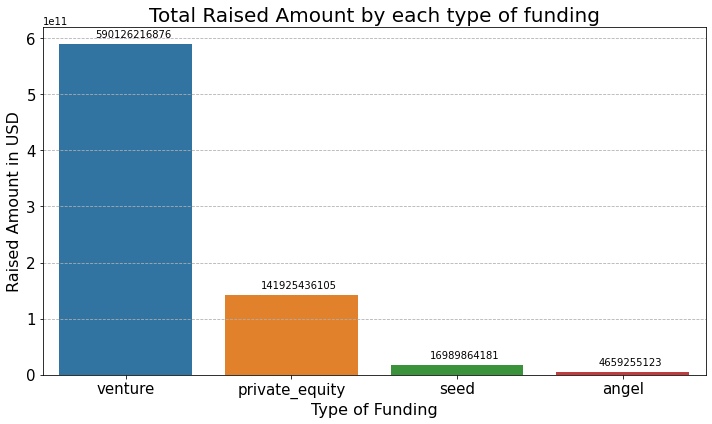

In [40]:
# Total Raised Amount by each four type of funding

ord=fund4.groupby('funding_round_type').sum().sort_values('raised_amount_usd',ascending=False).index

plt.figure(figsize=(10,6))
plots=sns.barplot(data=fund4,x='funding_round_type',y='raised_amount_usd',estimator=np.sum,order=ord,ci=None)

for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.0f'), 
                       (bar.get_x() + bar.get_width() / 2, 
                        bar.get_height()), ha='center', va='center',
                       size=10, xytext=(8, 10),
                       textcoords='offset points')

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Type of Funding', fontsize=16)
plt.ylabel('Raised Amount in USD', fontsize=16)
plt.title('Total Raised Amount by each type of funding',fontsize=20)
plt.grid(axis = 'y', linestyle = '--')


plt.tight_layout()
plt.savefig('Plots/Total Raised Amount by each type of funding 4',dpi=300)

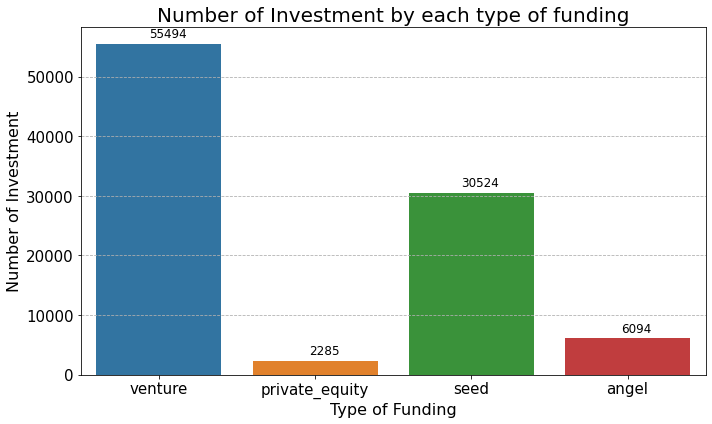

In [41]:
# Number of Investment by each four type of funding

plt.figure(figsize=(10,6))
plots=sns.countplot(data=fund4,x='funding_round_type',order=ord)

for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.0f'), 
                       (bar.get_x() + bar.get_width() / 2, 
                        bar.get_height()), ha='center', va='center',
                       size=12, xytext=(9, 10),
                       textcoords='offset points')

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Type of Funding', fontsize=16)
plt.ylabel('Number of Investment', fontsize=16)
plt.title('Number of Investment by each type of funding',fontsize=20)
plt.grid(axis = 'y', linestyle = '--')


plt.tight_layout()
plt.savefig('Plots/Number of Investment with each types of funding 4',dpi=200)

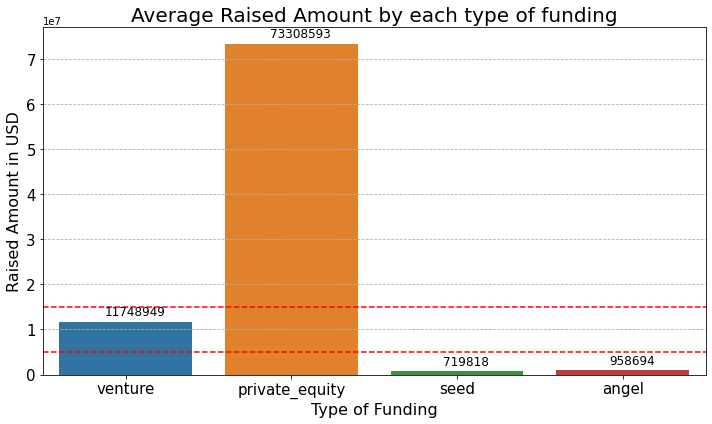

In [42]:
#Average Raised Amount by each four type of funding 

plt.figure(figsize=(10,6))
plots=sns.barplot(data=fund4,x='funding_round_type',y='raised_amount_usd',estimator=np.mean,order=ord,ci=None)

for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.0f'), 
                       (bar.get_x() + bar.get_width() / 2, 
                        bar.get_height()), ha='center', va='center',
                       size=12, xytext=(9, 10),
                       textcoords='offset points')

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Type of Funding', fontsize=16)
plt.ylabel('Raised Amount in USD', fontsize=16)
plt.title('Average Raised Amount by each type of funding',fontsize=20)
plt.grid(axis = 'y', linestyle = '--')
plt.axhline(y=5000000, color='r', linestyle='--')
plt.axhline(y=15000000, color='r', linestyle='--')

plt.tight_layout()
plt.savefig('Plots/Average Raised Amount by each type of funding 4',dpi=200)

In [43]:
# Average investment amount 
fund4.groupby('funding_round_type')['raised_amount_usd'].mean().sort_values(ascending=False)

funding_round_type
private_equity   73308593.029
venture          11748949.129
angel              958694.470
seed               719817.997
Name: raised_amount_usd, dtype: float64

Based on the most representative investment amount calculated above, Spark Funds want to invest within 5M to 15M investment per round. As we can see, the Venture funding type has the most no. of investment, the most amount of investment and more importantly its average raised amount is within the desired range. Hence, Spark should go ahead with the Venture type of funding.

-------------

# Country Analysis

In [44]:
#Filtering with most suitable investment type
venture_df=master_frame.loc[master_frame['funding_round_type']=='venture'].copy()

In [45]:
venture_df.shape 

(55494, 8)

In [46]:
#Top 9 countries based on total investment amount they have received

venture_df.groupby('country_code').sum().sort_values('raised_amount_usd',ascending=False).head(9)

,raised_amount_usd
country_code,
USA,422510842796.000
CHN,39835418773.000
GBR,20245627416.000
IND,14391858718.000
CAN,9583332317.000
FRA,7259536732.000
ISR,6907514579.000
DEU,6346959822.000
JPN,3363676611.000


In [47]:
# Creating top9 dataframe which include only top nine countries based on the total investment amount each country 
# has received

top9_index=venture_df.groupby('country_code').sum().sort_values('raised_amount_usd',ascending=False).head(9).index
top9=venture_df[venture_df['country_code'].isin(top9_index)]

* Top English speaking country - **USA** <br>
* Second English speaking country -	 **GBR** <br>
* Third English speaking country -	 **IND**


In [48]:
#filteting with Top 3 English Speaking Countries
venture_top3_c=venture_df.loc[venture_df['country_code'].isin(['USA','GBR','IND'])]

-----

# Sector Analysis 

In [49]:
#Extracting primary sector from category list
venture_top3_c['primary_sector']=venture_top3_c['category_list'].str.split('|',expand=True)[0]

## Preparing Mapping

In [50]:
mapping=pd.read_csv('data/mapping.csv')

In [51]:
mapping.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 688 entries, 0 to 687
Data columns (total 10 columns):
 #   Column                                   Non-Null Count  Dtype 
---  ------                                   --------------  ----- 
 0   category_list                            687 non-null    object
 1   Automotive & Sports                      688 non-null    int64 
 2   Blanks                                   688 non-null    int64 
 3   Cleantech / Semiconductors               688 non-null    int64 
 4   Entertainment                            688 non-null    int64 
 5   Health                                   688 non-null    int64 
 6   Manufacturing                            688 non-null    int64 
 7   News, Search and Messaging               688 non-null    int64 
 8   Others                                   688 non-null    int64 
 9   Social, Finance, Analytics, Advertising  688 non-null    int64 
dtypes: int64(9), object(1)
memory usage: 53.9+ KB


In [52]:
mapping.isnull().sum()

category_list                              1
Automotive & Sports                        0
Blanks                                     0
Cleantech / Semiconductors                 0
Entertainment                              0
Health                                     0
Manufacturing                              0
News, Search and Messaging                 0
Others                                     0
Social, Finance, Analytics, Advertising    0
dtype: int64

In [53]:
#Changing 0 to na 
index=list(mapping[mapping['category_list'].str.contains('0.',na=False)].index)

mapping['category_list']=np.where(mapping['category_list'].index.isin(index),     #condtion
                                  mapping['category_list'].str.replace('0','na'), #if true
                                  mapping['category_list'])                       #if false

In [54]:
#Mapping Main sector to category list 

mapping=mapping.melt('category_list',var_name='main_sector')
mapping=mapping.loc[mapping['value']==1].sort_values('category_list')
mapping.drop('value',axis=1,inplace=True)
mapping.reset_index(drop=True,inplace=True)

In [55]:
mapping

,category_list,main_sector
0,3D,Manufacturing
1,3D Printing,Manufacturing
2,3D Technology,Manufacturing
3,Accounting,"Social, Finance, Analytics, Advertising"
4,Active Lifestyle,Health
...,...,...
683,nanotechnology,Cleantech / Semiconductors
684,natural Language Processing,Cleantech / Semiconductors
685,natural Resources,Cleantech / Semiconductors
686,navigation,"News, Search and Messaging"


In [56]:
# We don't require Blanks as Main Sector so we will remove all rows which contains Main Sector as Blank

mapping=mapping[mapping['main_sector']!='Blanks']

In [57]:
#Merging venture_top3_c with mapping

D=venture_top3_c.merge(mapping,how='left',left_on='primary_sector',right_on='category_list').copy()

In [58]:
#Dropping category_list_x and _y

D.drop(['category_list_x','category_list_y'],axis=1,inplace=True)

D.head(10)

,company_permalink,funding_round_permalink,funding_round_type,raised_amount_usd,name,homepage_url,country_code,primary_sector,main_sector
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,10000000.000,#fame,http://livfame.com,IND,Media,Entertainment
1,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,NaN,:Qounter,http://www.qounter.com,USA,Application Platforms,"News, Search and Messaging"
2,/organization/004-technologies,/funding-round/1278dd4e6a37fa4b7d7e06c21b3c1830,venture,NaN,004 Technologies,http://004gmbh.de/en/004-interact,USA,Software,Others
3,/organization/0xdata,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,20000000.000,H2O.ai,http://h2o.ai/,USA,Analytics,"Social, Finance, Analytics, Advertising"
4,/organization/0xdata,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,1700000.000,H2O.ai,http://h2o.ai/,USA,Analytics,"Social, Finance, Analytics, Advertising"
5,/organization/0xdata,/funding-round/e1cfcbe1bdf4c70277c5f29a3482f24e,venture,8900000.000,H2O.ai,http://h2o.ai/,USA,Analytics,"Social, Finance, Analytics, Advertising"
6,/organization/1-mainstream,/funding-round/b952cbaf401f310927430c97b68162ea,venture,5000000.000,1 Mainstream,http://www.1mainstream.com,USA,Apps,"News, Search and Messaging"
7,/organization/10-minutes-with,/funding-round/0faccbbcc5818dc5326469f13f5a8ac8,venture,4000000.000,10 Minutes With,http://10minuteswith.com,GBR,Education,Others
8,/organization/1000lookz,/funding-round/e07f6e580046d00c7aeb33fafb9d90a3,venture,NaN,1000Lookz,http://1000lookz.com,IND,Beauty,Health
9,/organization/1000memories,/funding-round/502bd0e50c27616995e4bdad24605ef8,venture,2520000.000,1000memories,http://1000memories.com,USA,Curated Web,"News, Search and Messaging"


In [59]:
#Selecting rows only whose raised amount in between 5 to 15 Million
D=D.loc[(D['raised_amount_usd']>=5000000) & (D['raised_amount_usd']<=15000000)]

#Renaming country code USA, GBR and IND to Country 1, Country 2 and Country 3 respectively
D['country_code']=np.where(D['country_code']=='USA','Country 1',D['country_code'])
D['country_code']=np.where(D['country_code']=='GBR','Country 2',D['country_code'])
D['country_code']=np.where(D['country_code']=='IND','Country 3',D['country_code'])

#Renaming funding type to FT
D['funding_round_type']='FT'

#Creating 3 separate dataframe based on Country 1, Country 2 and Country 3
D1=D.loc[D['country_code']=='Country 1']
D2=D.loc[D['country_code']=='Country 2']
D3=D.loc[D['country_code']=='Country 3']

Ensuring that all above conditions have successfully executed i.e range should be within 5 to 15 million and the country code should be renamed.

In [60]:
D['raised_amount_usd'].describe()

count      13108.000
mean     8921630.657
std      3071639.347
min      5000000.000
25%      6000001.000
50%      8300000.000
75%     11000000.000
max     15000000.000
Name: raised_amount_usd, dtype: float64

In [61]:
D['country_code'].unique()

array(['Country 3', 'Country 1', 'Country 2'], dtype=object)

In [62]:
# printing total number of investment in each 3 countries

print('Country 1 Total Number of Investments : ',D1['raised_amount_usd'].count())
print('Country 2 Total Number of Investments : ',D2['raised_amount_usd'].count())
print('Country 3 Total Number of Investments : ',D3['raised_amount_usd'].count())

Country 1 Total Number of Investments :  12150
Country 2 Total Number of Investments :  628
Country 3 Total Number of Investments :  330


In [63]:
# printing total amount of investment in each 3 countries

print('Country 1 Total Amount of Investments : ',round(D1['raised_amount_usd'].sum()*1000000))
print('Country 2 Total Amount of Investments : ',round(D2['raised_amount_usd'].sum()*1000000))
print('Country 3 Total Amount of Investments : ',round(D3['raised_amount_usd'].sum()*1000000))

Country 1 Total Amount of Investments :  108531347515000000
Country 2 Total Amount of Investments :  5436843539000000
Country 3 Total Amount of Investments :  2976543602000000


In [76]:
D1.groupby('main_sector').describe().style.background_gradient(cmap='Greens',axis=0).set_precision(0)


As per above table we can conclude this:

|Country 1  | Sector Name | No. of Investment |
| --- | --- | --- |
| 1| Others | 2950 |
| 2| Social, Finance, Analytics, Advertising | 2714 |
| 3| Cleantech / Semiconductors | 2300 |

-----


In [65]:
D2.groupby('main_sector').describe().style.background_gradient(cmap='Greys',axis=0).set_precision(0)


As per above table we can conclude this:

|Country 2  | Sector Name | No. of Investment |
| --- | --- | --- |
| 1| Others | 147 |
| 2| Social, Finance, Analytics, Advertising | 133 |
| 3| Cleantech / Semiconductors | 128 |

-----

In [66]:
D3.groupby('main_sector').describe().style.background_gradient(cmap='Reds',axis=0).set_precision(0)


As per above table we can conclude this:

|Country 3  | Sector Name | No. of Investment |
| --- | --- | --- |
| 1| Others | 110 |
| 2| Social, Finance, Analytics, Advertising | 60 |
| 3| News, Search and Messaging | 52 |

-----

In [67]:
#Checking top company in top sector in country 1

top_company_c1=D1[D1['main_sector']=='Others']

top_company_c1.groupby('company_permalink').sum().sort_values('raised_amount_usd',ascending=False)

,raised_amount_usd
company_permalink,
/organization/virtustream,64300000.000
/organization/capella,54968051.000
/organization/airtight-networks,54201907.000
/organization/decarta,52100000.000
/organization/black-duck-software,51000000.000
...,...
/organization/startforce,5000000.000
/organization/lumeta,5000000.000
/organization/storenvy,5000000.000


In [68]:
#Checking top companies in top 2 sectors in country 1

top_company_c1=D1[D1['main_sector']=='Others']
print(top_company_c1.pivot_table(values='raised_amount_usd',
                            index=['name'],
                            aggfunc='sum').sort_values('raised_amount_usd',ascending=False).head(3))


top2_company_c1=D1[D1['main_sector']=='Social, Finance, Analytics, Advertising']
print(top2_company_c1.pivot_table(values='raised_amount_usd',
                            index=['name'],
                            aggfunc='sum').sort_values('raised_amount_usd',ascending=False).head(3))

                   raised_amount_usd
name                                
Virtustream             64300000.000
Capella Photonics       54968051.000
AirTight Networks       54201907.000
                                 raised_amount_usd
name                                              
SST Inc. (Formerly ShotSpotter)       67933006.000
Demandbase                            63000000.000
Intacct                               61800000.000


In [69]:
#Checking top companies in top 2 sectors in country 2

top_company_c2=D2[D2['main_sector']=='Others']
print(top_company_c2.pivot_table(values='raised_amount_usd',
                            index=['name'],
                            aggfunc='sum').sort_values('raised_amount_usd',ascending=False).head(3))

top2_company_c2=D2[D2['main_sector']=='Social, Finance, Analytics, Advertising']
print(top2_company_c2.pivot_table(values='raised_amount_usd',
                            index=['name'],
                            aggfunc='sum').sort_values('raised_amount_usd',ascending=False).head(3))

                raised_amount_usd
name                             
Electric Cloud       37000000.000
SenSage              36250000.000
Enigmatec            32500000.000
                       raised_amount_usd
name                                    
Celltick Technologies       37500000.000
myThings                    34000000.000
Zopa                        32900000.000


In [70]:
#Checking top companies in top 2 sectors in country 3

top_company_c3=D3[D3['main_sector']=='Others']
print(top_company_c3.pivot_table(values='raised_amount_usd',
                            index=['name'],
                            aggfunc='sum').sort_values('raised_amount_usd',ascending=False).head(3))

top2_company_c3=D3[D3['main_sector']=='Social, Finance, Analytics, Advertising']
print(top2_company_c3.pivot_table(values='raised_amount_usd',
                            index=['name'],
                            aggfunc='sum').sort_values('raised_amount_usd',ascending=False).head(3))

              raised_amount_usd
name                           
FirstCry.com       39000000.000
Myntra             38000000.000
CommonFloor        32900000.000
                 raised_amount_usd
name                              
Manthan Systems       50700000.000
Komli Media           28000000.000
ShopClues.com         25000000.000


### Below is summary table of each countries top sector with compnay name and raised amount

|Country|Sector|Compnay Name|Raised Amount|
|-|-|--|-|
|Country 1|Others|Virtustream|64300000|
||Social, Finance, Analytics, Advertising|SST Inc. (Formerly ShotSpotter)|67933006|
|Country 2|Others|Electric Cloud|37000000|
||Social, Finance, Analytics, Advertising|Celltick Technologies |37500000|
|Country 3|Others|FirstCry.com|39000000|
||Social, Finance, Analytics, Advertising|Manthan Systems|50700000|

# Checkpoint 6: Plots


## 1. A plot showing the representative amount of investment in each funding type. This chart should make it clear that a certain funding type (FT) is best suited for Spark Funds.

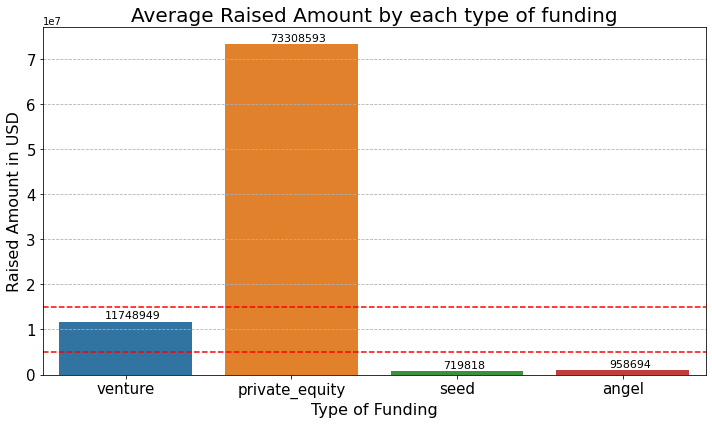

In [71]:
# Plot showing the representative amount of investment in each funding type

plt.figure(figsize=(10,6))
plots=sns.barplot(data=fund4,x='funding_round_type',y='raised_amount_usd',estimator=np.mean,order=ord,ci=None)

for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.0f'), 
                       (bar.get_x() + bar.get_width() / 2, 
                        bar.get_height()), ha='center', va='center',
                       size=11, xytext=(7, 6),
                       textcoords='offset points')

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Type of Funding', fontsize=16)
plt.ylabel('Raised Amount in USD', fontsize=16)
plt.title('Average Raised Amount by each type of funding',fontsize=20)
plt.grid(axis = 'y', linestyle = '--')

#Ploting Horizontal line at 5 and 15 miliion
plt.axhline(y=5000000, color='r', linestyle='--')
plt.axhline(y=15000000, color='r', linestyle='--')

plt.tight_layout()
plt.savefig('Plots/Average Raised Amount by each type of funding 4',dpi=200)


--------

##  2. Plot showing the top 9 countries against the total amount of investments of funding type FT. This should make the top 3 countries (Country 1, Country 2, and Country 3) very clear.

In [72]:
#Creating columns to separate English Speaking countries
top9['English Speaking']=np.where(top9['country_code'].isin(['USA','GBR','IND','CAN']),'yes','no')

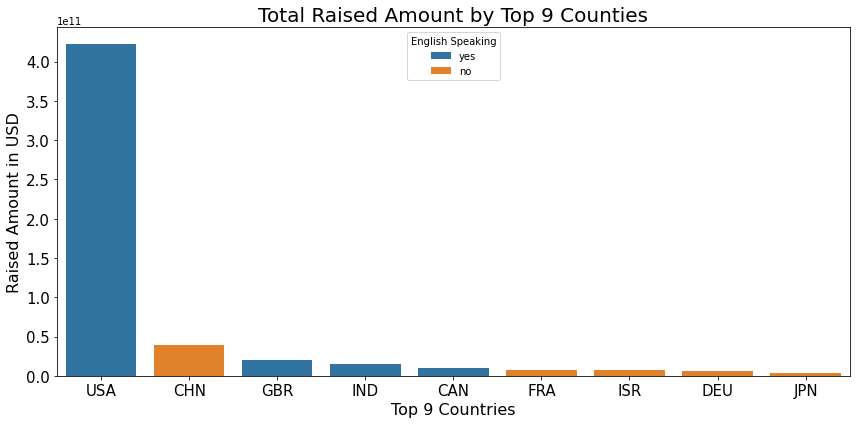

In [73]:
plt.figure(figsize=(12,6))

ord_top=top9.groupby('country_code').sum().sort_values('raised_amount_usd',ascending=False).index

sns.barplot(data=top9,x=top9['country_code'],y=top9['raised_amount_usd'],hue=top9['English Speaking'],
            order=ord_top,dodge=False,estimator=np.sum,ci=None)

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Top 9 Countries', fontsize=16)
plt.ylabel('Raised Amount in USD', fontsize=16)
plt.title('Total Raised Amount by Top 9 Counties',fontsize=20)



plt.tight_layout()
plt.savefig('Plots/Total Raised Amount by Top 9 Counties',dpi=200)

## 3. A plot showing the number of investments in the top 3 sectors of the top 3 countries on one chart (for the chosen investment type FT). This plot should clearly display the top 3 sectors each in Country 1, Country 2, and Country 3.

In [74]:
#concatenating three dataframe to visualize with countries and sectors

top3_sector_country=pd.concat([(D1.pivot_table(values='raised_amount_usd',
                                index=['country_code','main_sector'],
                                aggfunc='count').sort_values('raised_amount_usd',ascending=False).head(3)),
                               (D2.pivot_table(values='raised_amount_usd',
                                index=['country_code','main_sector'],
                                aggfunc='count').sort_values('raised_amount_usd',ascending=False).head(3)),
                               (D3.pivot_table(values='raised_amount_usd',
                                index=['country_code','main_sector'],
                                aggfunc='count').sort_values('raised_amount_usd',ascending=False).head(3))],axis=0)
#reset index
top3_sector_country=top3_sector_country.reset_index()

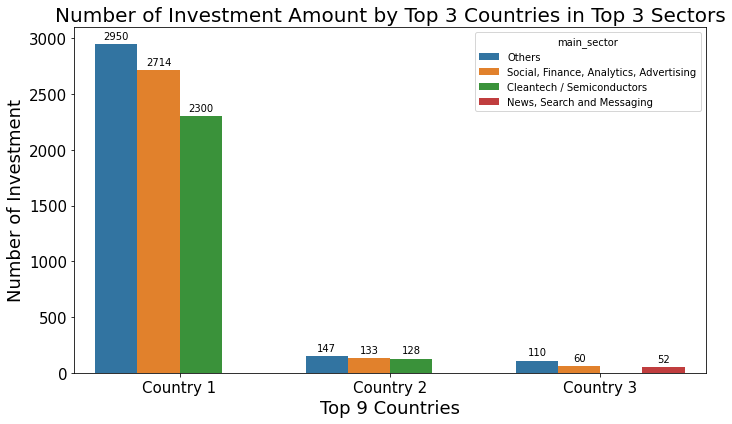

In [75]:
# Plot showing the number of investments in the top 3 sectors of the top 3 countries
plt.figure(figsize=(10,6))


plots=sns.barplot(data=top3_sector_country,hue='main_sector',y='raised_amount_usd',ci=None,x='country_code',dodge=True)
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.0f'), 
                       (bar.get_x() + bar.get_width() / 2, 
                        bar.get_height()), ha='center', va='center',
                       size=10, xytext=(0, 8),
                       textcoords='offset points')

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Top 9 Countries', fontsize=18)
plt.ylabel('Number of Investment', fontsize=18)
plt.title('Number of Investment Amount by Top 3 Countries in Top 3 Sectors',fontsize=20)


plt.tight_layout()
plt.savefig('Plots/No of Investment in Top 3 Countries in Top 3 Sectors',dpi=200)

# Conclusions:

* Based on analysis done on data, Spark fund should consider investing in countries USA, GBR, and IND.
* In these Spark Fund can invest in the top sector as followings: Others, Social, Finance, Analytics, Advertising and News, Search and Messaging.
* Below are top companies in their top sector and country:

<br>


|Country|Sector|Compnay Name|Raised Amount|
|-|-|--|-|
|Country 1|Others|Virtustream|64300000|
||Social, Finance, Analytics, Advertising|SST Inc. (Formerly ShotSpotter)|67933006|
|Country 2|Others|Electric Cloud|37000000|
||Social, Finance, Analytics, Advertising|Celltick Technologies |37500000|
|Country 3|Others|FirstCry.com|39000000|
||Social, Finance, Analytics, Advertising|Manthan Systems|50700000|


---------------------